## Support Vector Machines

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.model_selection import train_test_split

data = datasets.load_iris()

In [9]:
dataframe = pd.DataFrame(data=data.data,columns=data.feature_names)


In [11]:
dataframe['species'] = data.target

In [12]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
#Binary classifier using SVM

#to find whether it belong to class 0 or not
predictors = dataframe.drop('species',axis=1)
labels = dataframe['species']


In [16]:
labels = (labels==0)

In [42]:
#split data into train and test dataset
trainX,testX,trainY,testY = train_test_split(predictors,labels,test_size=0.4)
 

In [43]:
#Scaling Values and Training the classification Model

full_pipeline = Pipeline([
    ('std_scalar',StandardScaler()),
    ('linear_svm',LinearSVC(C=1,loss='hinge'))
])

svm_clf = full_pipeline.fit(trainX,trainY)

In [44]:
#testing the model

testX.iloc[24]


sepal length (cm)    5.6
sepal width (cm)     2.5
petal length (cm)    3.9
petal width (cm)     1.1
Name: 69, dtype: float64

In [45]:
testY.iloc[24]


np.False_

In [46]:
svm_clf.predict([[5.0,3.4,1.5,0.2]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
#calculating performance metrics for this classification
from sklearn.metrics import precision_score,recall_score,f1_score

predication = svm_clf.predict(testX)
precision = precision_score(testY,predication)
recall = recall_score(testY,predication)
f1_score = (precision,recall)

print("Precison :",precision)
print("Recall:",recall)
print("F1 Score:",f1_score)



Precison : 1.0
Recall: 1.0
F1 Score: (1.0, 1.0)


In [ ]:
! /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install seaborn

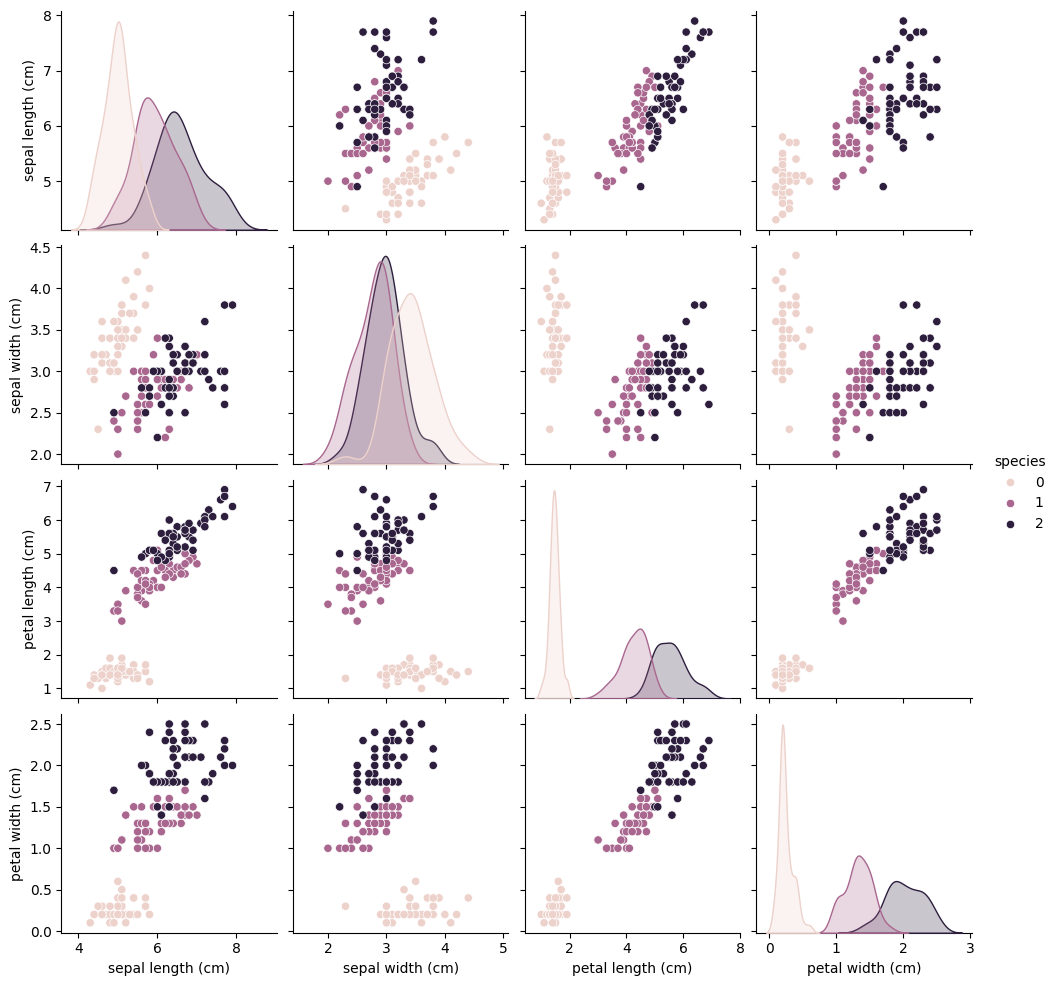

In [ ]:
#visualizing whether the data is linearly seperable or non-seperable
import seaborn as sns
import matplotlib.pyplot as plt
newData = (dataframe['species']==0)
sns.pairplot(dataframe,hue='species')


##### Polynomial Transformation - Non-Linear SVM

In [53]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [54]:
moon_dataset = make_moons()

In [60]:
X, y = make_moons(n_samples=100, noise=0.15)

In [ ]:
polynomial_feature_svc = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('std_scalar',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

In [69]:
polynomial_feature_svc.fit(X,y)

,steps,"[('std_scalar', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [ ]:
x_test,y_test = make_moons(n_samples=200, noise=0.25)
y_predictions =polynomial_feature_svc.predict(x_test)



In [ ]:
p = precision_score(y_test,y_predictions)
p



0.8723404255319149